In [6]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

path = os.getcwd()
data = pd.read_csv('C:\\Users\\Orly\\PycharmProjects\\sleek_HW'+'\\data_all.csv', index_col=None, header=0)

data.shape
data.columns

Index(['Unnamed: 0', ' Destination Port', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Lengt

I first load the data. Next I will look at the data and some statistics:

In [13]:
data.head()

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,type
0,0,54865,3,2,0,12,0,6,6,6.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
1,1,55054,109,1,1,6,6,6,6,6.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
2,2,55055,52,1,1,6,6,6,6,6.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
3,3,46236,34,1,1,6,6,6,6,6.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
4,4,54863,3,2,0,12,0,6,6,6.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS


In [5]:
data.describe().round()

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,...,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0
mean,1415371.0,8071.0,14785664.0,9.0,10.0,549.0,16163.0,208.0,19.0,58.0,...,5.0,-2742.0,81551.0,41134.0,153183.0,58296.0,8316037.0,503844.0,8695752.0,7920031.0
std,817165.0,18284.0,33653744.0,750.0,997.0,9994.0,2263088.0,717.0,60.0,186.0,...,636.0,1084989.0,648600.0,393382.0,1025825.0,577092.0,23630079.0,4602984.0,24366888.0,23363419.0
min,0.0,0.0,-13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-536870661.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,707686.0,53.0,155.0,2.0,1.0,12.0,0.0,6.0,0.0,6.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1415371.0,80.0,31316.0,2.0,2.0,62.0,123.0,37.0,2.0,34.0,...,1.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2123056.0,443.0,3204828.0,5.0,4.0,187.0,482.0,81.0,36.0,50.0,...,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2830742.0,65535.0,119999998.0,219759.0,291922.0,12900000.0,655453030.0,24820.0,2325.0,5941.0,...,213557.0,138.0,110000000.0,74200000.0,110000000.0,110000000.0,120000000.0,76900000.0,120000000.0,120000000.0


now it seems that there are many columns which are only zeros. that is no informative at all. so I remove those columns.

In [22]:
col_remove = []
for i in range(0,data.shape[1]):
    if (data.iloc[:,i] == 0).all():
        col_remove.append(data.columns[i])
        
data = data.drop(col_remove, axis=1)
data = data.drop_duplicates()
data.shape

(2830743, 73)

next we need to understand what is the ration of each class we have. as we can see from the graph below, we have many samples from benign class. this means we have a case of imbalanced dataset.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'BENIGN'),
  Text(1, 0, 'DDoS'),
  Text(2, 0, 'PortScan'),
  Text(3, 0, 'Bot'),
  Text(4, 0, 'Infiltration'),
  Text(5, 0, 'Web Attack � Brute Force'),
  Text(6, 0, 'Web Attack � XSS'),
  Text(7, 0, 'Web Attack � Sql Injection'),
  Text(8, 0, 'FTP-Patator'),
  Text(9, 0, 'SSH-Patator'),
  Text(10, 0, 'DoS slowloris'),
  Text(11, 0, 'DoS Slowhttptest'),
  Text(12, 0, 'DoS Hulk'),
  Text(13, 0, 'DoS GoldenEye'),
  Text(14, 0, 'Heartbleed')])

C:\Users\Orly\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
C:\Users\Orly\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


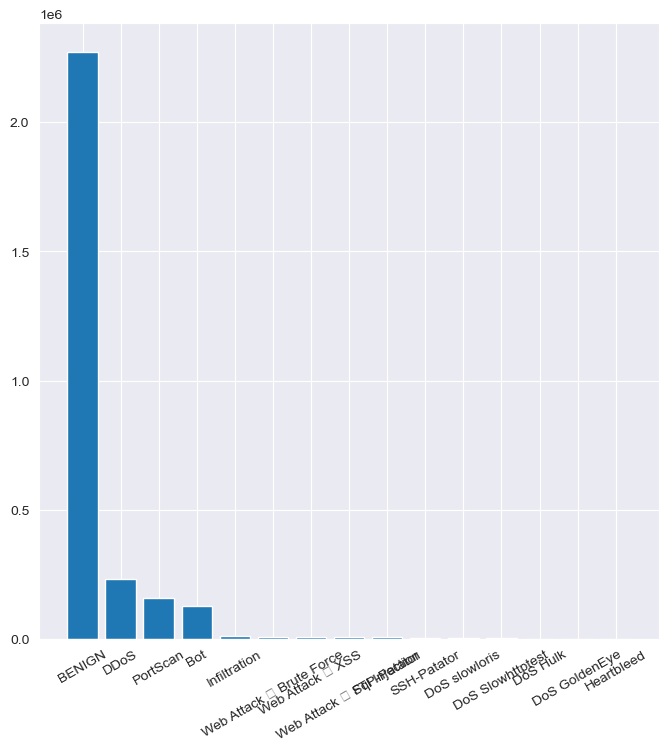

In [23]:
plt.figure(figsize=(8, 8))
class_counts = data[' Label'].value_counts()

plt.bar(data[" Label"].unique(), class_counts)
plt.xticks(rotation=30)

next

normal_data = data.loc[data[' Label'] == 'BENIGN']
fig, ax = plt.subplots(3, 3, figsize=(30, 30))
for var, subplot in zip(normal_data.columns, ax.flatten()):
    sns.histplot(data = normal_data, x=var, ax=subplot)
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=45)

next

C:\Users\Orly\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
C:\Users\Orly\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


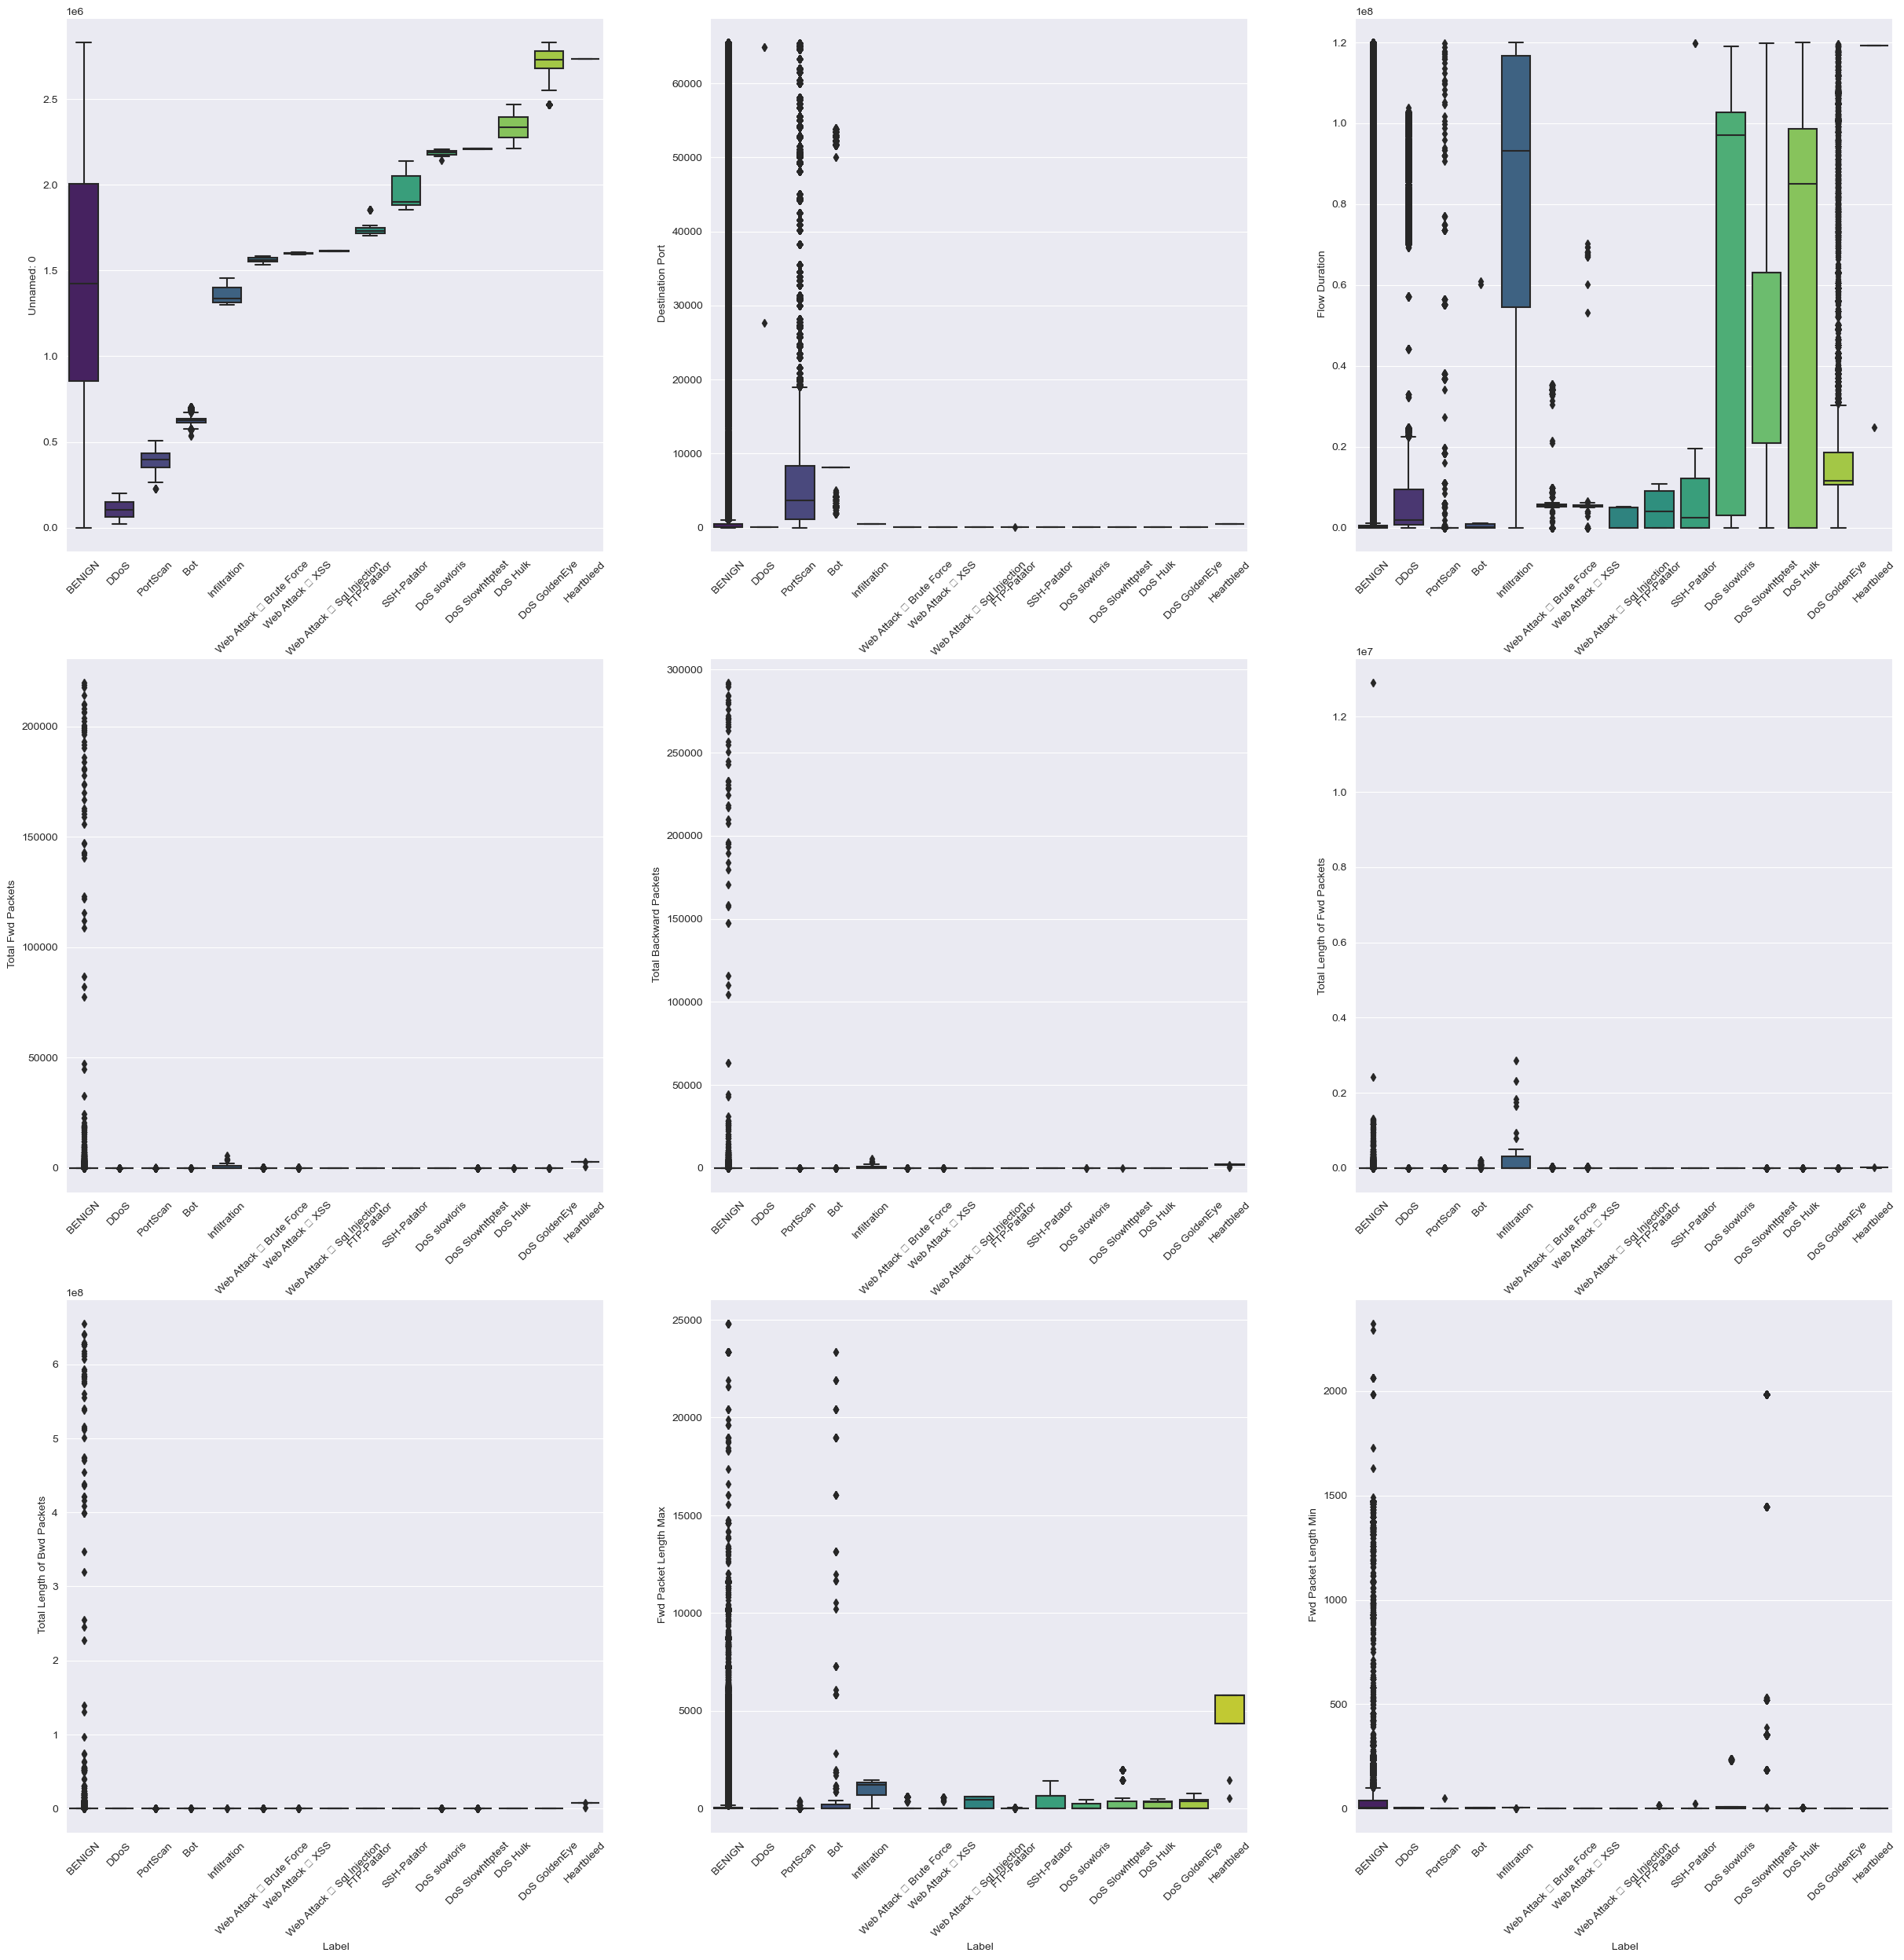

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(30, 30))
for var, subplot in zip(data.columns, ax.flatten()):
    sns.boxplot(x=' Label', y=var, data=data, ax=subplot, palette='viridis')
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=45)